# Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_csv("Leads.csv")
data.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


## Data Information

In [3]:
data.shape

(9240, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
data = data.drop(columns=['How did you hear about X Education', 'Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                          'Digital Advertisement', 'Lead Profile', 'Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score',
                          'I agree to pay the amount through cheque', 'Country', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'City'])
data.shape

(9240, 16)

In [7]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
# Create a dictionary to map old column names to new ones
column_mapping = {
    'Lead Origin': 'Lead_Source',
    'Lead Source': 'Lead_Channel',
    'Converted': 'Conversion',
    'TotalVisits': 'Total_Visits',
    'Total Time Spent on Website': 'Time_Spent_on_Website',
    'Page Views Per Visit': 'Avg_Page_Views_per_Visit',
    'Last Activity': 'Last_Activity',
    'What is your current occupation': 'Occupation',
    'Through Recommendations': 'Through_Recommendations',
    'Receive More Updates About Our Courses': 'Receive_More_Course_Updates',
    'Update me on Supply Chain Content': 'Supply_Chain_Updates',
    'Get updates on DM Content': 'DM_Updates',
    'Lead Profile': 'Profile',
    'I agree to pay the amount through cheque': 'Pay_by_Cheque',
    'A free copy of Mastering The Interview': 'Free_Interview_Copy',
    'Last Notable Activity': 'Notable_Activity'
}

# Rename the columns using the mapping
data = data.rename(columns=column_mapping)

# Now, the columns have more descriptive names


In [9]:
data.describe()

,Conversion,Total_Visits,Time_Spent_on_Website,Avg_Page_Views_per_Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


## Handling Missing Values

In [10]:
zero_values_count = data[(data['Total_Visits'] == 0) & (data['Time_Spent_on_Website'] == 0)].shape[0]
zero_values_count

2189

In [11]:
data = data.drop(data[(data['Total_Visits'] == 0) & (data['Time_Spent_on_Website'] == 0)].index)

In [12]:
data.shape

(7051, 16)

In [13]:
data.isnull().sum()

Lead_Source                       0
Lead_Channel                      8
Conversion                        0
Total_Visits                    137
Time_Spent_on_Website             0
Avg_Page_Views_per_Visit        137
Last_Activity                   103
Specialization                  624
Occupation                     1876
Search                            0
Through_Recommendations           0
Receive_More_Course_Updates       0
Supply_Chain_Updates              0
DM_Updates                        0
Free_Interview_Copy               0
Notable_Activity                  0
dtype: int64

In [14]:
data['Total_Visits'] = pd.to_numeric(data['Total_Visits'])

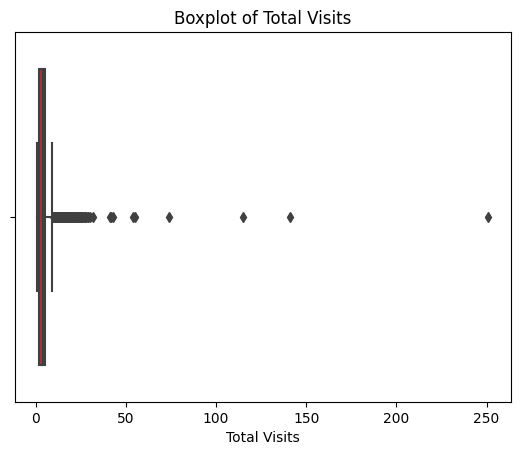

In [15]:
# plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Total_Visits'], color='firebrick')

# Add labels and a title for the plot
plt.xlabel('Total Visits')
plt.title('Boxplot of Total Visits')

# Display the plot
plt.show()

In [16]:
data['Total_Visits'] = data['Total_Visits'].fillna(data['Total_Visits'].median())

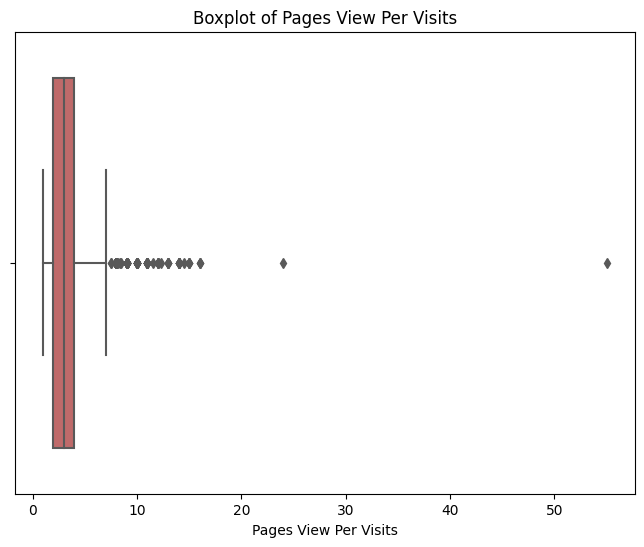

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Avg_Page_Views_per_Visit'], color='indianred')

plt.xlabel('Pages View Per Visits')
plt.title('Boxplot of Pages View Per Visits')

plt.show()

In [18]:
data['Avg_Page_Views_per_Visit'] = data['Avg_Page_Views_per_Visit'].fillna(data['Avg_Page_Views_per_Visit'].median())

In [19]:
data['Last_Activity'] = data['Last_Activity'].fillna(data['Last_Activity'].mode()[0])

In [20]:
data['Specialization'] = data['Specialization'].fillna(data['Specialization'].mode()[0])

In [ ]:
occup = data['Occupation'].mode()
occup[0]

In [22]:
data['Occupation'] = data['Occupation'].fillna(occup[0])

In [23]:
data['Lead_Channel'] = data['Lead_Channel'].fillna(data['Lead_Channel'].mode()[0])

In [24]:
data.isnull().sum()

Lead_Source                    0
Lead_Channel                   0
Conversion                     0
Total_Visits                   0
Time_Spent_on_Website          0
Avg_Page_Views_per_Visit       0
Last_Activity                  0
Specialization                 0
Occupation                     0
Search                         0
Through_Recommendations        0
Receive_More_Course_Updates    0
Supply_Chain_Updates           0
DM_Updates                     0
Free_Interview_Copy            0
Notable_Activity               0
dtype: int64

# Data Visualization

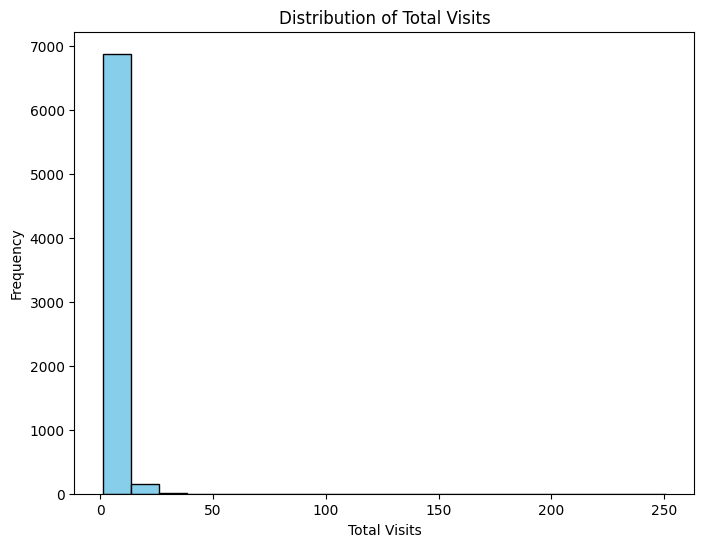

In [25]:
# @title To view the Distribution for the Total Visits
plt.figure(figsize=(8, 6))
plt.hist(data['Total_Visits'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Visits')
plt.ylabel('Frequency')
plt.title('Distribution of Total Visits')
plt.show()


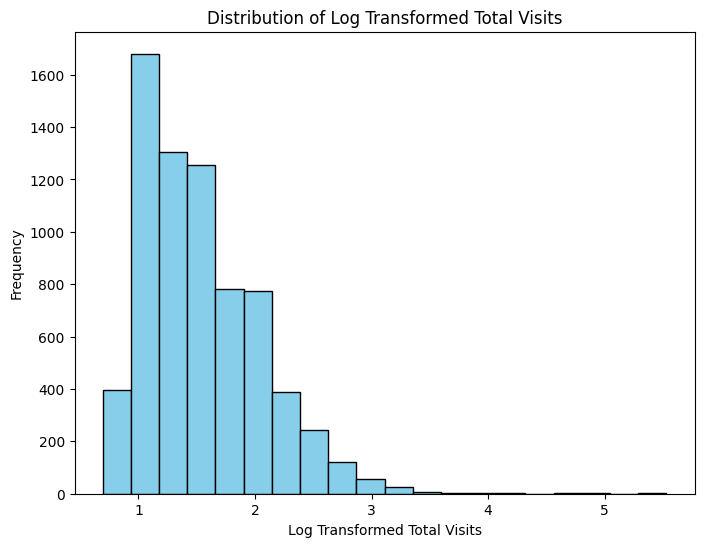

In [26]:
data['TotalVisits_log'] = np.log1p(data['Total_Visits'])

plt.figure(figsize=(8, 6))
plt.hist(data['TotalVisits_log'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Log Transformed Total Visits')
plt.ylabel('Frequency')
plt.title('Distribution of Log Transformed Total Visits')

plt.show()


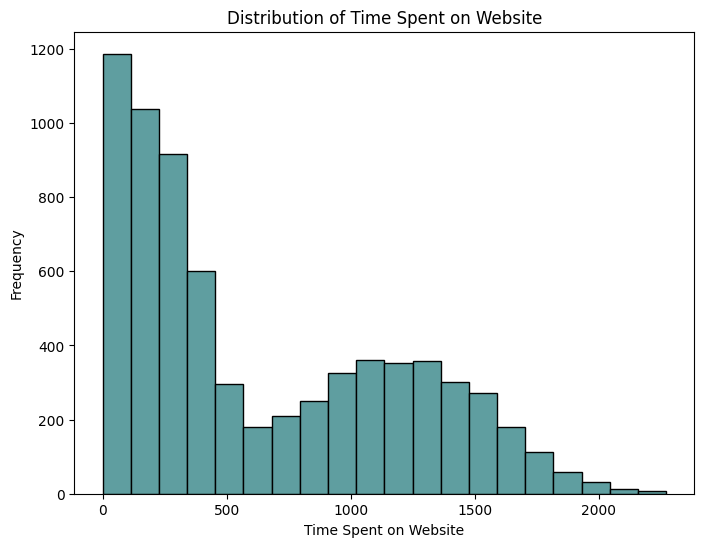

In [27]:
# @title To view the Distribution for the Time Spent on Website
plt.figure(figsize=(8, 6))
plt.hist(data['Time_Spent_on_Website'], bins=20, color='cadetblue', edgecolor='black')
plt.xlabel('Time Spent on Website')
plt.ylabel('Frequency')
plt.title('Distribution of Time Spent on Website')
plt.show()


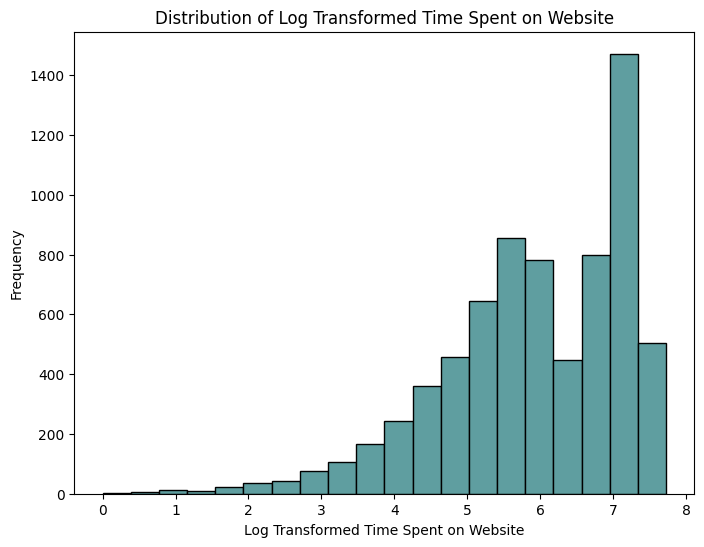

In [28]:
data['Time_Spent_on_Website_log'] = np.log1p(data['Time_Spent_on_Website'])  # Using log1p to avoid division by zero

plt.figure(figsize=(8, 6))
plt.hist(data['Time_Spent_on_Website_log'], bins=20, color='cadetblue', edgecolor='black')
plt.xlabel('Log Transformed Time Spent on Website')
plt.ylabel('Frequency')
plt.title('Distribution of Log Transformed Time Spent on Website')
plt.show()


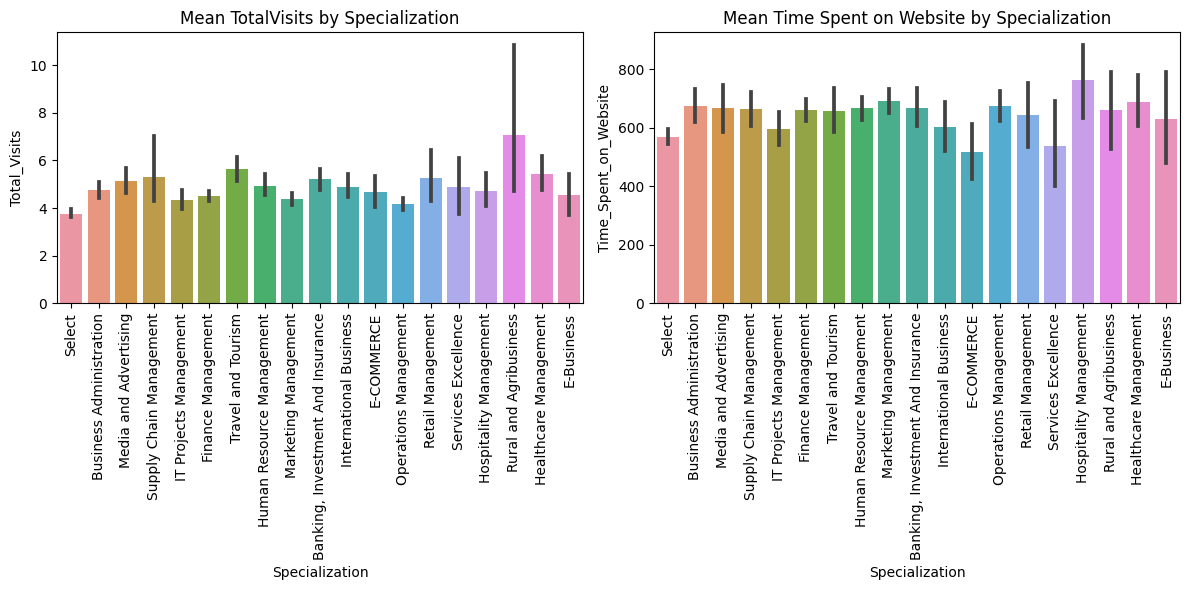

In [29]:
# @title Mean TotalVisits & Time Spent on Website by Specialization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=data, x='Specialization', y='Total_Visits')
plt.xticks(rotation=90)
plt.title('Mean TotalVisits by Specialization')

# Create a bar plot to visualize the mean Time_Spent_on_Website by Specialization
plt.subplot(1, 2, 2)
sns.barplot(data=data, x='Specialization', y='Time_Spent_on_Website')
plt.xticks(rotation=90)
plt.title('Mean Time Spent on Website by Specialization')

plt.tight_layout()
plt.show()

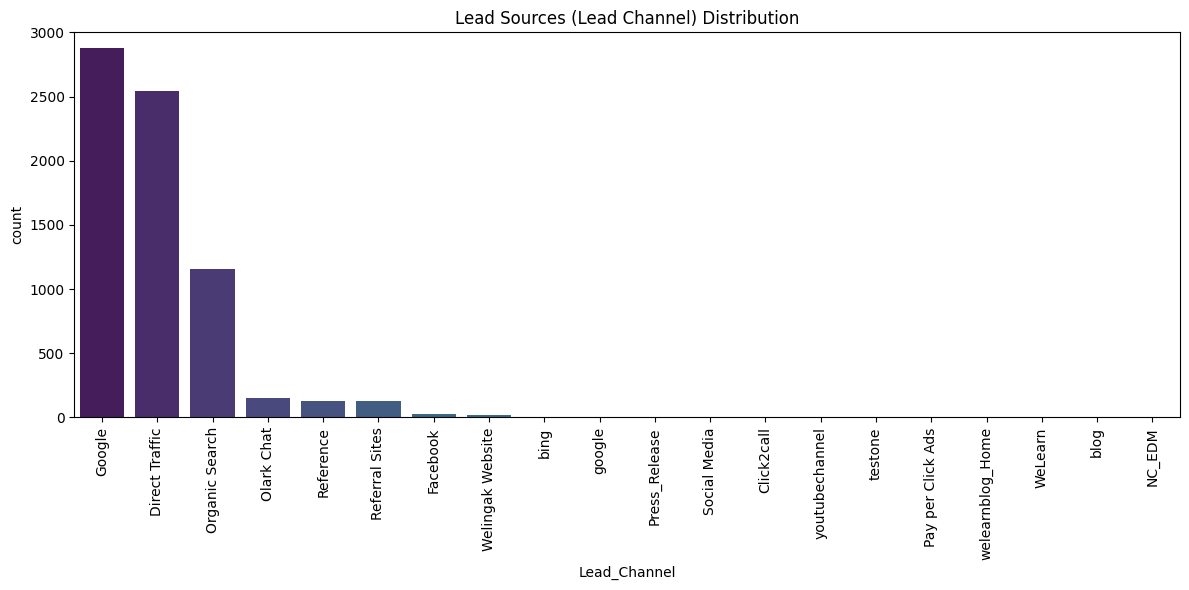

In [30]:
# @title View Lead source channel
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Lead_Channel', order=data['Lead_Channel'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Lead Sources (Lead Channel) Distribution')

plt.ylim(0, 3000)

# Adjust plot layout for better visibility
plt.tight_layout()

plt.show()

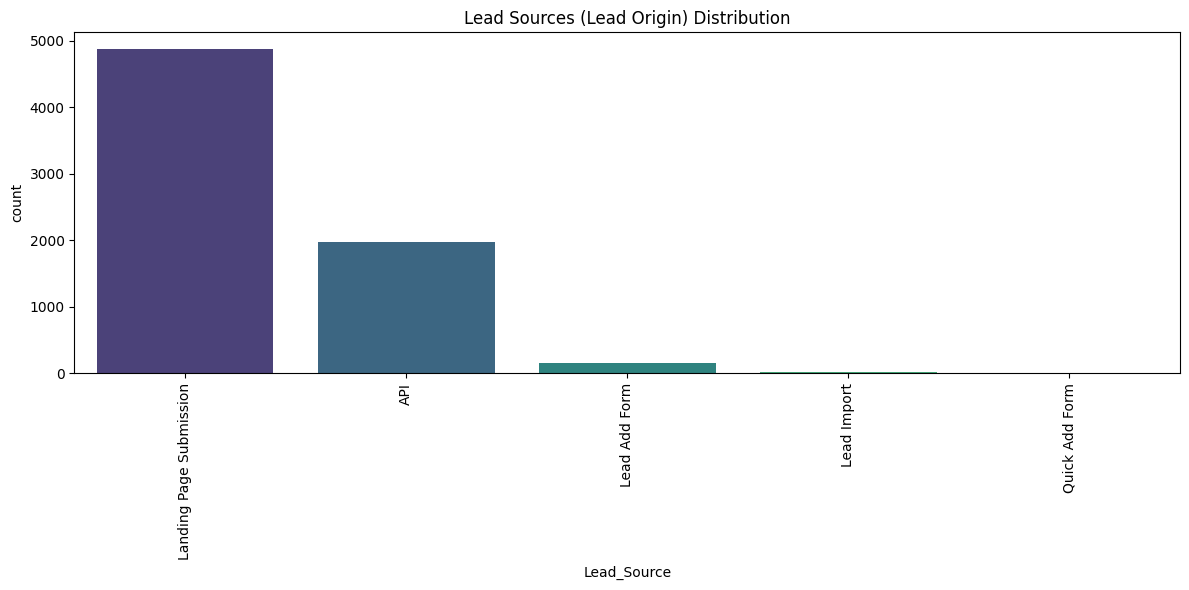

In [31]:
# @title View Lead source origin
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Lead_Source', order=data['Lead_Source'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Lead Sources (Lead Origin) Distribution')


# Adjust plot layout for better visibility
plt.tight_layout()

plt.show()

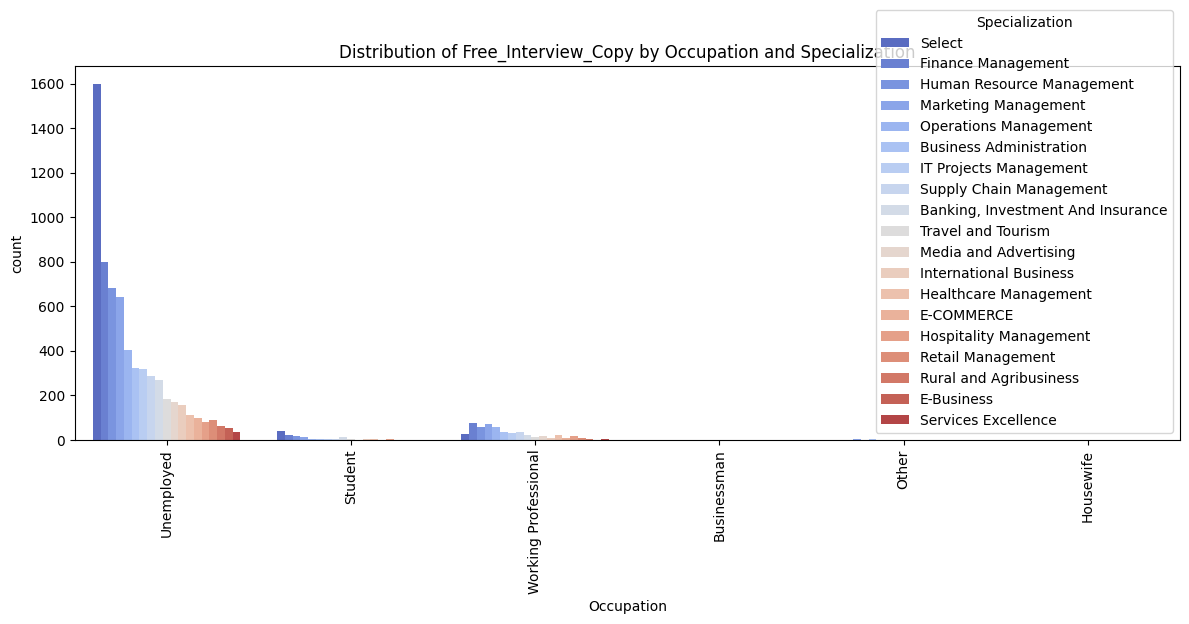

In [32]:
# @title View Distribution of Free Interview Copy by Occupation and Specialization
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Occupation', hue='Specialization', hue_order=data['Specialization'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Free_Interview_Copy by Occupation and Specialization')
plt.xticks(rotation=90)

# Adjust plot layout for better visibility
plt.tight_layout()

plt.show()

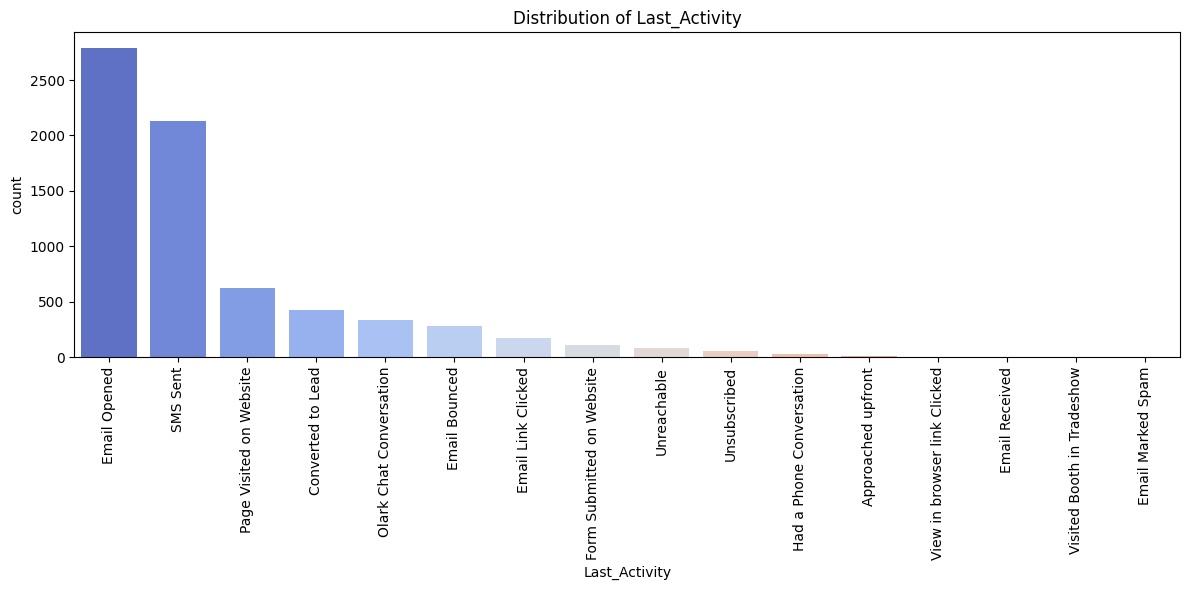

In [33]:
# @title View Last Activity
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Last_Activity', palette='coolwarm', order=data['Last_Activity'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Last_Activity')

# Adjust plot layout for better visibility
plt.tight_layout()

plt.show()

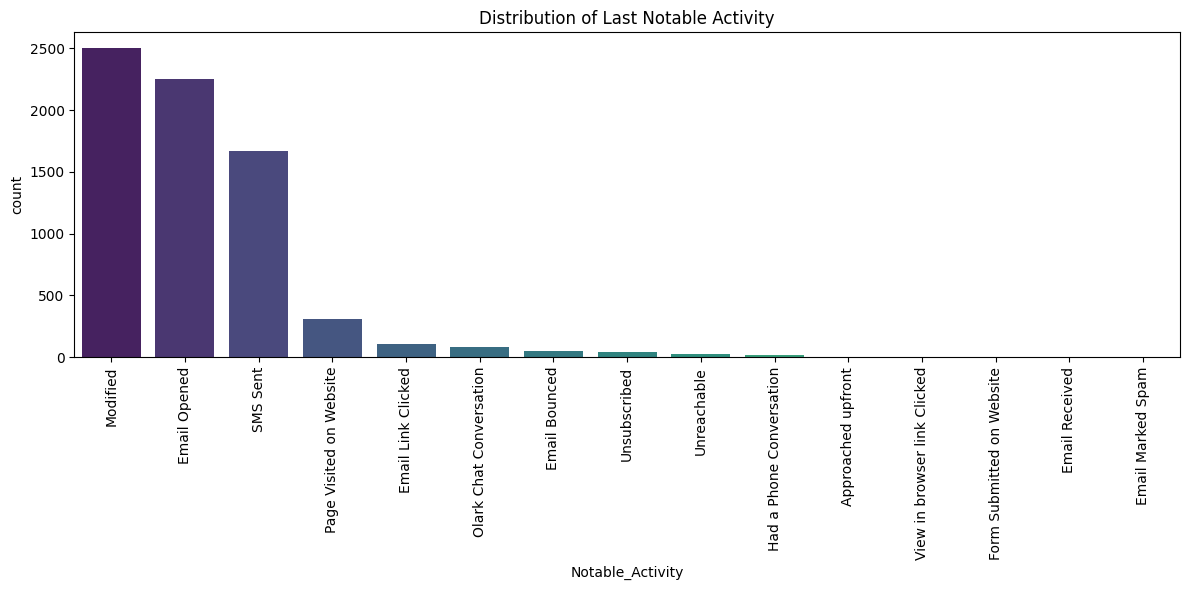

In [34]:
# @title View Notable Activity
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Notable_Activity', palette='viridis', order=data['Notable_Activity'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Last Notable Activity')

plt.tight_layout()

plt.show()

### Save the Preprocessed Dataset

In [35]:
data.to_csv("Processed_lead.csv", index=False)

# Machine Learning Model Development

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [37]:
lead_data = pd.read_csv("Processed_lead.csv")

In [38]:
lead_data.columns

Index(['Lead_Source', 'Lead_Channel', 'Conversion', 'Total_Visits',
       'Time_Spent_on_Website', 'Avg_Page_Views_per_Visit', 'Last_Activity',
       'Specialization', 'Occupation', 'Search', 'Through_Recommendations',
       'Receive_More_Course_Updates', 'Supply_Chain_Updates', 'DM_Updates',
       'Free_Interview_Copy', 'Notable_Activity', 'TotalVisits_log',
       'Time_Spent_on_Website_log'],
      dtype='object')

In [39]:
# @title Encoding the Categorical Values
categorical_columns = ['Lead_Source', 'Lead_Channel', 'Last_Activity', 'Specialization', 'Occupation',
                       'Search', 'Through_Recommendations', 'Receive_More_Course_Updates', 'Supply_Chain_Updates',
                       'DM_Updates', 'Free_Interview_Copy', 'Notable_Activity']

lead_data = pd.get_dummies(data, columns=categorical_columns)

In [40]:
# @title Choose Dependent and Independent Variable
X = lead_data.drop(columns=["Conversion", 'TotalVisits_log',
       'Time_Spent_on_Website_log'])
y = lead_data["Conversion"]

In [41]:
# @title Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# @title Train the Model Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
# @title Test the Trained Model
y_pred = model.predict(X_test)

In [44]:
# @title Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

In [45]:
# @title View the Evalution Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.79
Precision: 0.75
Recall: 0.64
F1 Score: 0.69
ROC AUC: 0.86


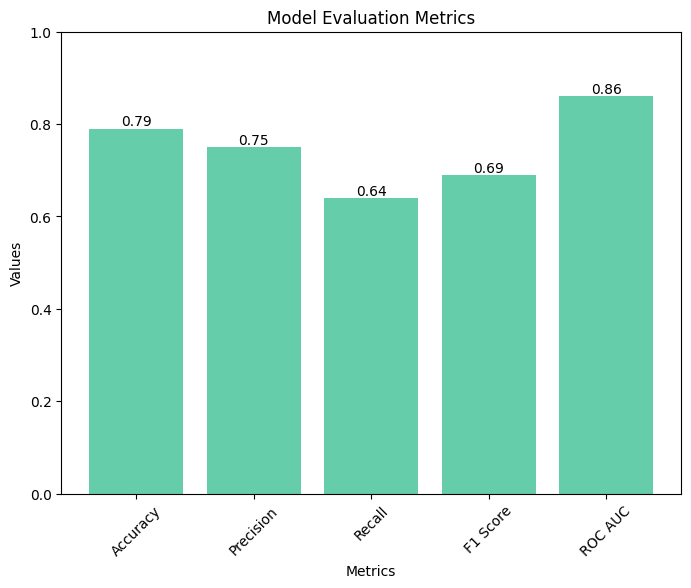

In [46]:
# @title Visual of Evalution Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
values = [0.79, 0.75, 0.64, 0.69, 0.86]

# Create a bar chart to visualize the metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='mediumaquamarine')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 (for better visualization)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the metric values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


### ROC Curve

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


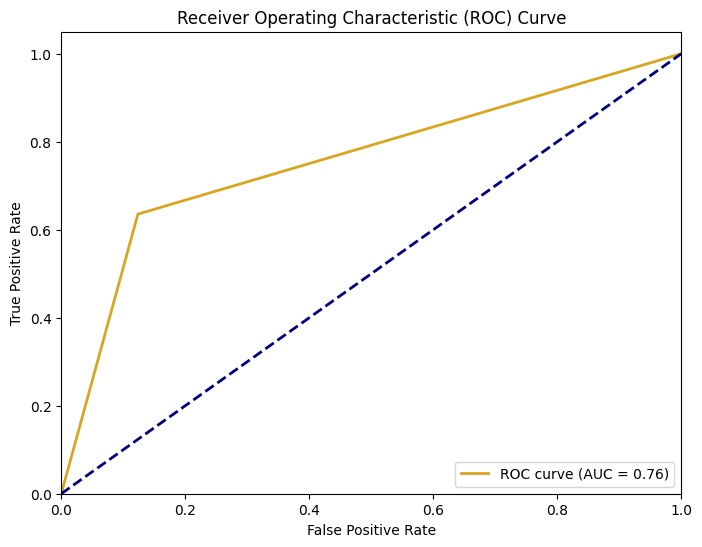

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='goldenrod', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [51]:
import joblib

joblib.dump(model, 'lead_model.pkl')


['lead_model.pkl']

In [ ]:
# Define Lead Scoring Criteria and Weights
criteria_weights = {
    'TotalVisits': 0.2,
    'Time_Spent_on_Website': 0.3,
    'Page_Views_Per_Visit': 0.2
}

# Calculate Lead Scores
lead_data['Lead_Score'] = (
    lead_data['Total_Visits'] * criteria_weights['TotalVisits'] +
    lead_data['Time_Spent_on_Website'] * criteria_weights['Time_Spent_on_Website'] +
    lead_data['Avg_Page_Views_per_Visit'] * criteria_weights['Page_Views_Per_Visit'] )
    # lead_data['Email_Interactions'] * criteria_weights['Email_Interactions']


# Set a Threshold
threshold = 0.7  # Adjust as needed

# Allocate Resources to High-Scoring Leads
lead_data['High_Scoring_Lead'] = lead_data['Lead_Score'] > threshold
lead_data['High_Scoring_Lead']
# Prioritize and Allocate Resources
# Focus marketing and sales efforts on high-scoring leads
# high_scoring_leads contains the leads with the highest conversion potential
